# Mobile Phone Price Dataset

In [1]:
import pandas as pd

data = pd.read_csv("Mobile phone price.csv")

display(data)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


### a. Identify the models & the price released by each brand.

In [18]:


for key, value in data.groupby("Brand")[["Model","Price"]]:
    print(key)


Apple
Asus
Blackberry
CAT
Google
Huawei
LG
Motorola
Nokia
OnePlus
Oppo
Realme
Samsung
Sony
Vivo
Xiaomi


### b. Identify the correlation between Battery Capacity and price.

In [17]:
df = pd.DataFrame(data)

#df['Battery Capacity (mAh)'] = pd.to_numeric(df['Battery Capacity (mAh)'], errors='coerce')
#df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')

correlation = df['Battery Capacity (mAh)'].corr(df['Price'])

print(f"Correlation between Battery Capacity and Price: {correlation}")



Correlation between Battery Capacity and Price: -0.39658137643652003


### c. Find how many models are there per each Battery capacity with same price.

In [16]:
models_per_battery_price = data.groupby(['Battery Capacity (mAh)', 'Price'])['Model'].count().reset_index()
display(models_per_battery_price)

,Battery Capacity (mAh),Price,Model
0,1821,399,4
1,1821,449,1
2,2227,699,2
3,2227,899,1
4,2691,699,1
...,...,...,...
174,6000,349,1
175,6000,379,1
176,6000,999,1
177,7000,429,1


### d. Count the number of models in each brand with highest storage. Draw the graph.

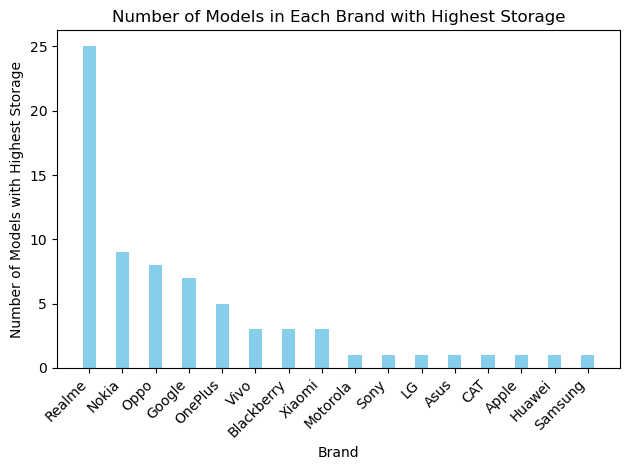

In [12]:

import matplotlib.pyplot as plt

df = pd.DataFrame(data)
data['Storage'] = [int("".join(filter(str.isdigit, s))) for s in data['Storage ']]

max_stor_per_brand = df.groupby('Brand')['Storage'].max()
max_stor_models = df[df.set_index(['Brand', 'Storage']).index.isin(max_stor_per_brand.items())]
count_per_brand = max_stor_models['Brand'].value_counts()

plt.bar(count_per_brand.index, count_per_brand,width=0.4,color='skyblue')

plt.xlabel('Brand')
plt.ylabel('Number of Models with Highest Storage')
plt.title('Number of Models in Each Brand with Highest Storage')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### e. Identify how many models are released by each brand.

In [22]:
df = pd.DataFrame(data)

models_per_brand = df['Brand'].value_counts()
display(models_per_brand)

Samsung       79
Xiaomi        67
Oppo          56
Realme        43
Vivo          35
Apple         30
Nokia         28
Motorola      23
OnePlus       15
Huawei        12
Google         7
Asus           4
LG             3
Blackberry     3
Sony           1
CAT            1
Name: Brand, dtype: int64

### f. Find the RAM capacity of all models of every brand.

In [6]:
data['RAM'] = [int("".join(filter(str.isdigit, s))) for s in data['RAM ']]
df = pd.DataFrame(data)
model = df.groupby(['Brand','Model'])['RAM'].unique()

display(model)


Brand   Model               
Apple   iPhone 11               [4]
        iPhone 11 Pro Max       [4]
        iPhone 12               [4]
        iPhone 12 Mini          [4]
        iPhone 12 Pro           [6]
                               ... 
Xiaomi  Redmi Note 10S          [6]
        Redmi Note 7            [4]
        Redmi Note 8            [4]
        Redmi Note 9 Pro Max    [6]
        Redmi Note 9S           [6]
Name: RAM, Length: 239, dtype: object

### g. Identify the correlation between Battery Capacity and price.

In [15]:
df = pd.DataFrame(data)

#df['Battery Capacity (mAh)'] = pd.to_numeric(df['Battery Capacity (mAh)'], errors='coerce')
#df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')

correlation = df['Battery Capacity (mAh)'].corr(df['Price'])

print(f"Correlation between Battery Capacity and Price: {correlation}")


Correlation between Battery Capacity and Price: -0.39658137643652003


### h.  Find how many models are there per each Battery capacity.

In [30]:
df = pd.DataFrame(data)
bat_cap = df.groupby('Battery Capacity (mAh)')['Model'].count().reset_index()
display(bat_cap)

,Battery Capacity (mAh),Model
0,1821,5
1,2227,3
2,2691,1
3,2800,1
4,2815,5
5,2942,5
6,3000,1
7,3095,1
8,3110,4
9,3174,1


### i. Calculate average price of each brand.

In [2]:
#df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
data['Price'] = [int("".join(filter(str.isdigit, s))) for s in data['Price ($)']]
print(data.groupby('Brand')['Price'].mean())

Brand
Apple          745.666667
Asus           874.000000
Blackberry     499.000000
CAT            299.000000
Google         699.000000
Huawei         783.166667
LG             615.666667
Motorola       278.130435
Nokia          244.714286
OnePlus        644.333333
Oppo           376.142857
Realme         206.906977
Samsung        480.405063
Sony          1299.000000
Vivo           323.000000
Xiaomi         282.880597
Name: Price, dtype: float64


### j. Find which mobile brand has highest price.

In [14]:
#df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
high_price = df.groupby('Brand')['Price'].max()
brand = high_price.idxmax()
maximum_price = high_price.max()
print(f"the highest price of the brand is {brand} and its price is ${maximum_price}")

the highest price of the brand is Samsung and its price is $1999


### k. Identify any missing values are there in mobile phone price dataset.

In [3]:
print("the missing values in mobilr phone price dataset: ",data.isnull().sum().sum())

the missing values in mobilr phone price dataset:  0


### l. Display all models associated with apple brand.

In [19]:
df = pd.DataFrame(data)
model = df[df['Brand'] == 'Apple']['Model'].unique()
display(model)

#unique

array(['iPhone 13 Pro', 'iPhone 13', 'iPhone 12 Mini', 'iPhone 11',
       'iPhone SE (2nd Gen)', 'iPhone XR', 'iPhone 11 Pro Max',
       'iPhone 13 Pro Max', 'iPhone SE (2020)', 'iPhone 12',
       'iPhone XS Max', 'iPhone 8 Plus', 'iPhone 12 mini',
       'iPhone 12 Pro', 'iPhone 12 Pro Max'], dtype=object)

### m. Find the mobile prices based on Camera (MP).

In [20]:
df = pd.DataFrame(data)
price = df.drop_duplicates(subset='Camera (MP)',keep='first')[['Camera (MP)','Price']]
display(price)

,Camera (MP),Price
0,12 + 12 + 12,999
1,108 + 10 + 10 + 12,1199
2,48 + 50 + 8 + 2,899
3,64 + 8 + 5 + 2,279
4,50 + 12.2,799
...,...,...
385,48+8+5+5,329
387,64+12+12,799
392,108+48+12+0.3,1199
400,48+16+2,329


### n. List the models along with brands which have highest storage.

In [21]:
high_stor = data["Storage"].max()
display(data[data["Storage"] == high_stor][["Model","Brand","Storage"]])

,Model,Brand,Storage
297,iPhone 11 Pro Max,Apple,512
361,P40 Pro+,Huawei,512
367,Galaxy S20 Ultra 5G,Samsung,512


### o. How many models in each brand having RAM>6.

In [22]:
high = df[df['RAM'] > 6]
high_Model = high.groupby('Brand')['Model'].count()
display(high_Model)

Brand
Asus         3
Google       5
Huawei      10
LG           1
Motorola     1
Nokia        2
OnePlus     12
Oppo        25
Realme      11
Samsung     19
Sony         1
Vivo        21
Xiaomi      10
Name: Model, dtype: int64

### p. List the models having price >600 and Storage between 100 and 200.

In [24]:

models = df[(df['Price'] > 600) & (df['Storage'].between(100, 200))]
display(models[['Brand', 'Model', 'Price', 'Storage']])


,Brand,Model,Price,Storage
0,Apple,iPhone 13 Pro,999,128
2,OnePlus,9 Pro,899,128
4,Google,Pixel 6,799,128
5,Apple,iPhone 13,799,128
8,Oppo,Reno6 Pro+ 5G,699,128
16,Samsung,Galaxy S21,799,128
23,OnePlus,9,729,128
60,Oppo,Reno6 Pro 5G,659,128
77,Apple,iPhone 13,799,128
78,Samsung,Galaxy S21,799,128
